In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data:

In [2]:
#read in the data
df = pd.read_csv('data/cumulative_clean.csv')
df.head()
df.info()
print("Data dimensions :", df.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'data/cumulative_clean.csv'

### Select Features:

In [ ]:
#Removing the unnecessary features
#drop columns with greater than 500 null values
missing_values_count = df.isnull().sum()
columns_to_keep = missing_values_count[missing_values_count <= 500].index
df_filtered = df[columns_to_keep]
#remove kepid, kepoi_name, koi_pdisposition and koi_tce_delivname and other columns that are not useful
df_filtered = df_filtered.drop(['kepid','kepoi_name','koi_pdisposition','koi_tce_delivname','koi_tce_plnt_num','ra','dec','koi_kepmag'], axis=1)
df_filtered

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
0,2,9.488036,170.538750,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927
1,2,54.418383,162.513840,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927
2,1,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868
3,2,2.525592,171.595550,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046
4,2,11.094321,171.201160,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,1,7.268182,135.934800,0.780,4.9850,46.7,1.66,1444.0,1027.95,9.7,6297.0,3.890,2.219
4643,1,376.379890,486.602200,0.305,13.9900,1140.0,3.26,265.0,1.16,13.3,6231.0,4.488,0.955
4644,1,367.947848,416.209980,0.902,4.2490,1301.0,3.72,228.0,0.64,10.7,5570.0,4.561,0.855
4645,1,1.739849,133.001270,0.043,3.1140,48.5,0.72,1608.0,1585.81,10.6,6119.0,4.444,1.031


In [ ]:
# Dealing with null data fields with mean values
df_filtered.fillna(df_filtered.mean(), inplace=True)
df_filtered.info()
print("Data dimensions :", df_filtered.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  4647 non-null   int64  
 1   koi_period       4647 non-null   float64
 2   koi_time0bk      4647 non-null   float64
 3   koi_impact       4647 non-null   float64
 4   koi_duration     4647 non-null   float64
 5   koi_depth        4647 non-null   float64
 6   koi_prad         4647 non-null   float64
 7   koi_teq          4647 non-null   float64
 8   koi_insol        4647 non-null   float64
 9   koi_model_snr    4647 non-null   float64
 10  koi_steff        4647 non-null   float64
 11  koi_slogg        4647 non-null   float64
 12  koi_srad         4647 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 472.1 KB
Data dimensions : (4647, 13)


| Feature           | Description                                  |
|-------------------|----------------------------------------------|
| koi_disposition   | The disposition of the Kepler Object of Interest: 0 = Not Exoplanet, 1 = Candidate, 2 = Confirmed |
| koi_period        | The orbit period of the planet in days       |
| koi_time0bk       | The transit epoch in Barycentric Kepler Julian Day |
| koi_impact        | The impact parameter of the planetary transit |
| koi_duration      | The duration of the planetary transit in hours |
| koi_depth         | The depth of the planetary transit in parts per million |
| koi_prad          | The planet radius in Earth radii             |
| koi_teq           | The equilibrium temperature of the planet in Kelvin |
| koi_insol         | The incident stellar flux upon the planet in Earth insolation |
| koi_model_snr     | The signal-to-noise ratio of the transit detection |
| koi_steff         | The effective stellar temperature in Kelvin  |
| koi_slogg         | The stellar surface gravity                  |
| koi_srad          | The stellar radius in solar radii            |

### Basic statistics

In [ ]:
basic_stats = df_filtered.describe()
print(basic_stats)

       koi_disposition     koi_period  koi_time0bk   koi_impact  koi_duration  \
count      4647.000000    4647.000000  4647.000000  4647.000000   4647.000000   
mean          1.575640      86.257842   166.795129     0.547936      4.738035   
std           0.514776    1910.111811    63.866021     2.871402      4.011881   
min           0.000000       0.241843   121.119423     0.000000      0.052000   
25%           1.000000       5.468943   134.090930     0.112000      2.361000   
50%           2.000000      13.153841   140.655700     0.386000      3.565000   
75%           2.000000      42.059039   171.936930     0.747500      5.684500   
max           2.000000  129995.778400   907.044710    98.602100     54.520000   

           koi_depth       koi_prad      koi_teq      koi_insol  \
count    4647.000000    4647.000000  4647.000000    4647.000000   
mean     1166.007015      44.495091   823.628362     725.939742   
std      6171.726627    1690.711783   473.580513    8285.135379   
mi

In [ ]:
agg_interests = {
    'koi_period': ['mean'],
    'koi_time0bk': ['mean'],
    'koi_impact': ['mean'],
    'koi_duration': ['mean'],
    'koi_depth': ['mean'],
    'koi_prad': ['mean'],
    'koi_teq': ['mean'],
    'koi_insol': ['mean'],
    'koi_model_snr': ['mean'],
    'koi_steff': ['mean'],
    'koi_slogg': ['mean'],
    'koi_srad': ['mean'],

}
df_filtered.groupby('koi_disposition').agg(agg_interests).transpose()

,koi_disposition,0,1,2
koi_period,mean,127.204333,169.944871,27.880207
koi_time0bk,mean,190.083703,180.226577,157.131064
koi_impact,mean,2.527371,0.652972,0.440679
koi_duration,mean,10.177077,5.326662,4.236626
koi_depth,mean,3013.893750,1358.982463,1000.483511
koi_prad,mean,327.965833,97.832505,2.751579
koi_teq,mean,944.437500,814.383795,827.867793
koi_insol,mean,2921.192500,1274.984803,308.980261
koi_model_snr,mean,81.306250,30.077026,70.273375
koi_steff,mean,5973.458333,5672.916311,5477.134778


Not Exoplanets (0): Longer orbital periods, higher impact, longer duration, deeper transits, much larger planet size, highest incident flux, hotter stars.

Candidates (1): Higher orbital periods than confirmed exoplanets, lower impact, shorter duration than non-exoplanets, shallower transits, smaller planet size than non-exoplanets, less incident flux than non-exoplanets, cooler stars than non-exoplanets.

Confirmed Exoplanets (2): Shortest orbital periods, lowest impact, shortest duration, shallowest transits, smallest planet size, moderate incident flux, cooler stars, highest surface gravity, smallest star size.

C:\Users\logan\AppData\Local\Temp\ipykernel_35452\2476414871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\logan\AppData\Local\Temp\ipykernel_35452\2476414871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\logan\AppData\Local\Temp\ipykernel_35452\2476414871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\logan\AppData\Local\Temp\ipykernel_35452\2476414871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

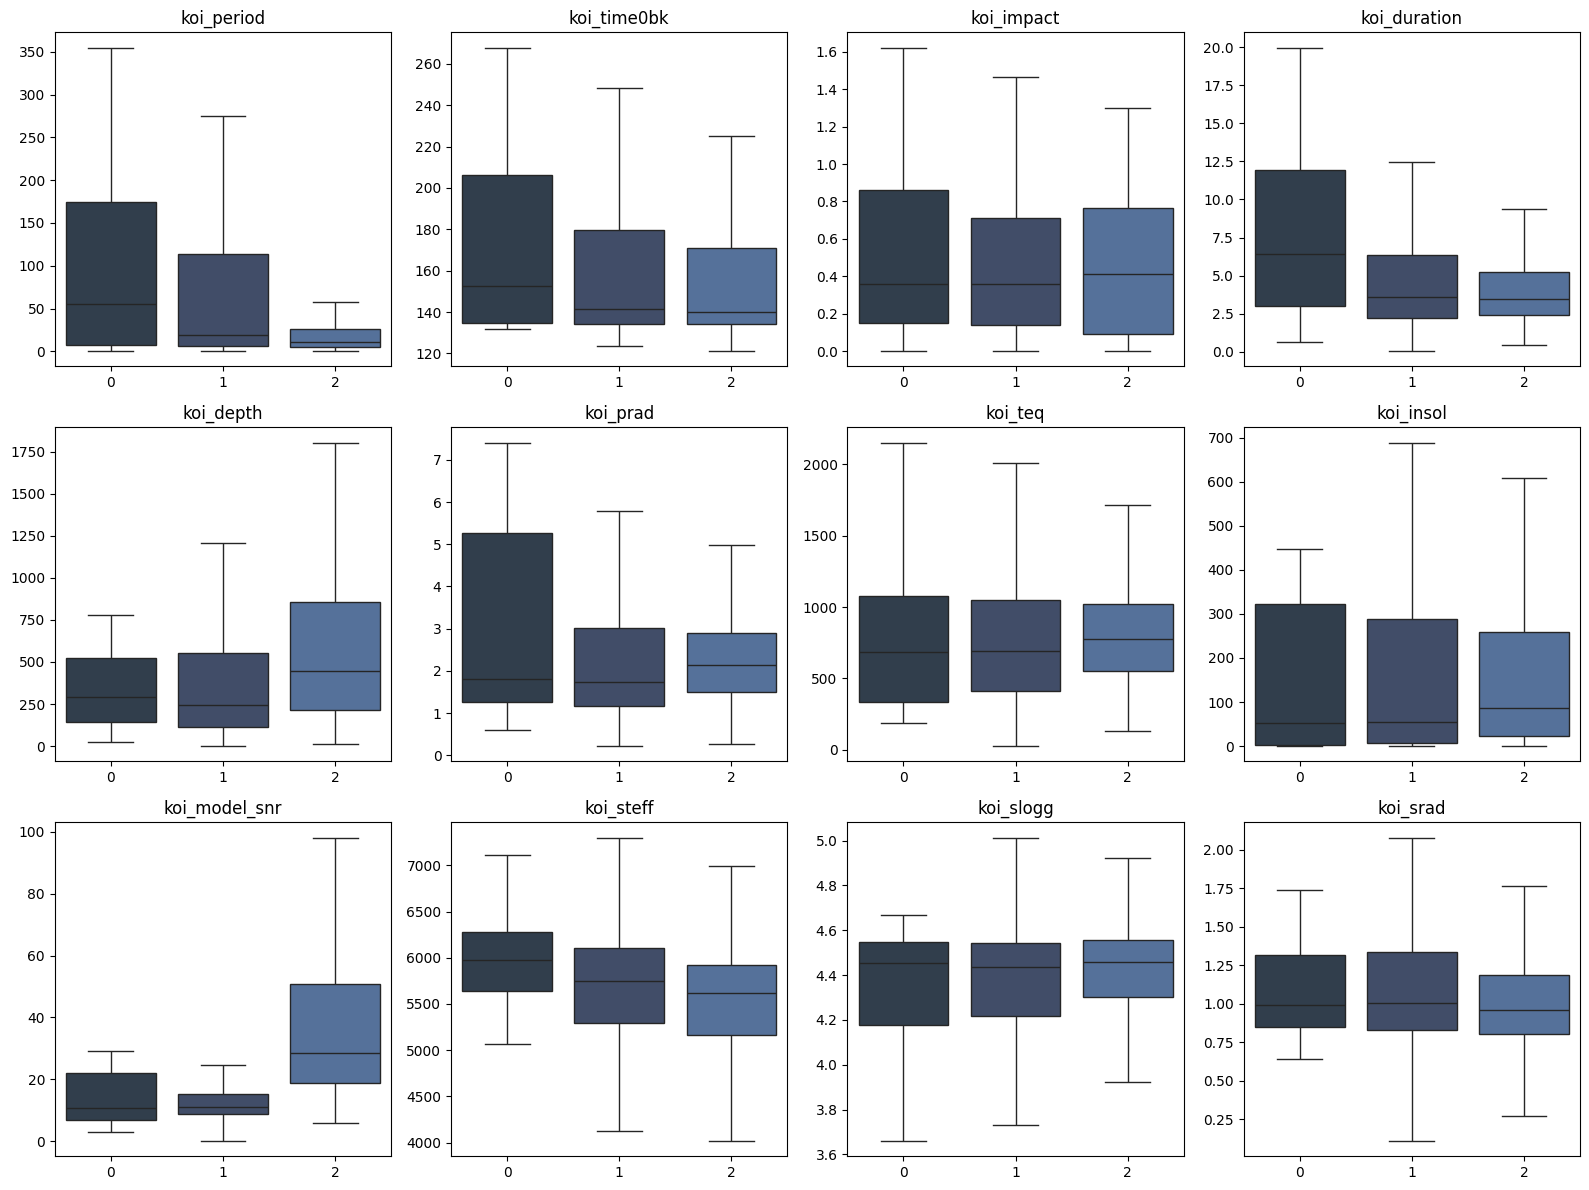

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_fields = df_filtered.select_dtypes(include=['float64', 'int64']).drop('koi_disposition', axis=1)
fields = numeric_fields.columns

n_cols = 4
n_rows = int(np.ceil(len(fields) / n_cols))

space_palette = ["#2c3e50", "#3a4b6e", "#4a6fa5"]

plt.figure(figsize=(n_cols * 4, n_rows * 4))  
for i, field in enumerate(fields):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(
        x='koi_disposition', 
        y=field, 
        data=df_filtered, 
        showfliers=False, 
        palette=space_palette
    )
    ax.set_title(field)
    ax.set_xlabel('')  
    ax.set_ylabel('')  

plt.tight_layout()
plt.show()

### Correlations between columns

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
koi_disposition,1.000000,-0.035227,-0.179601,-0.056364,-0.169506,-0.036545,-0.031476,0.005072,-0.062616,0.104935,-0.151519,0.161269,-0.077780
koi_period,-0.035227,1.000000,0.091585,0.003053,0.049802,0.002349,0.001297,-0.052777,-0.003787,-0.004182,-0.018205,0.002319,0.001098
koi_time0bk,-0.179601,0.091585,1.000000,0.026106,0.338955,0.042500,0.020227,-0.359984,-0.036780,-0.000417,0.036681,-0.041512,0.028140
koi_impact,-0.056364,0.003053,0.026106,1.000000,0.000966,0.005324,0.670301,-0.010682,-0.000055,-0.011063,0.011015,-0.065870,0.023985
koi_duration,-0.169506,0.049802,0.338955,0.000966,1.000000,0.020849,-0.001511,-0.322611,-0.045445,0.014360,0.234014,-0.229077,0.062435
koi_depth,-0.036545,0.002349,0.042500,0.005324,0.020849,1.000000,0.001479,-0.035296,-0.003003,0.318256,-0.042606,0.047898,-0.011360
koi_prad,-0.031476,0.001297,0.020227,0.670301,-0.001511,0.001479,1.000000,-0.002206,-0.000638,-0.005352,-0.005914,-0.092035,0.047512
koi_teq,0.005072,-0.052777,-0.359984,-0.010682,-0.322611,-0.035296,-0.002206,1.000000,0.466256,0.057511,0.249938,-0.361855,0.170166
koi_insol,-0.062616,-0.003787,-0.036780,-0.000055,-0.045445,-0.003003,-0.000638,0.466256,1.000000,0.001757,0.063774,-0.215030,0.104015
koi_model_snr,0.104935,-0.004182,-0.000417,-0.011063,0.014360,0.318256,-0.005352,0.057511,0.001757,1.000000,0.007107,0.008391,-0.007918


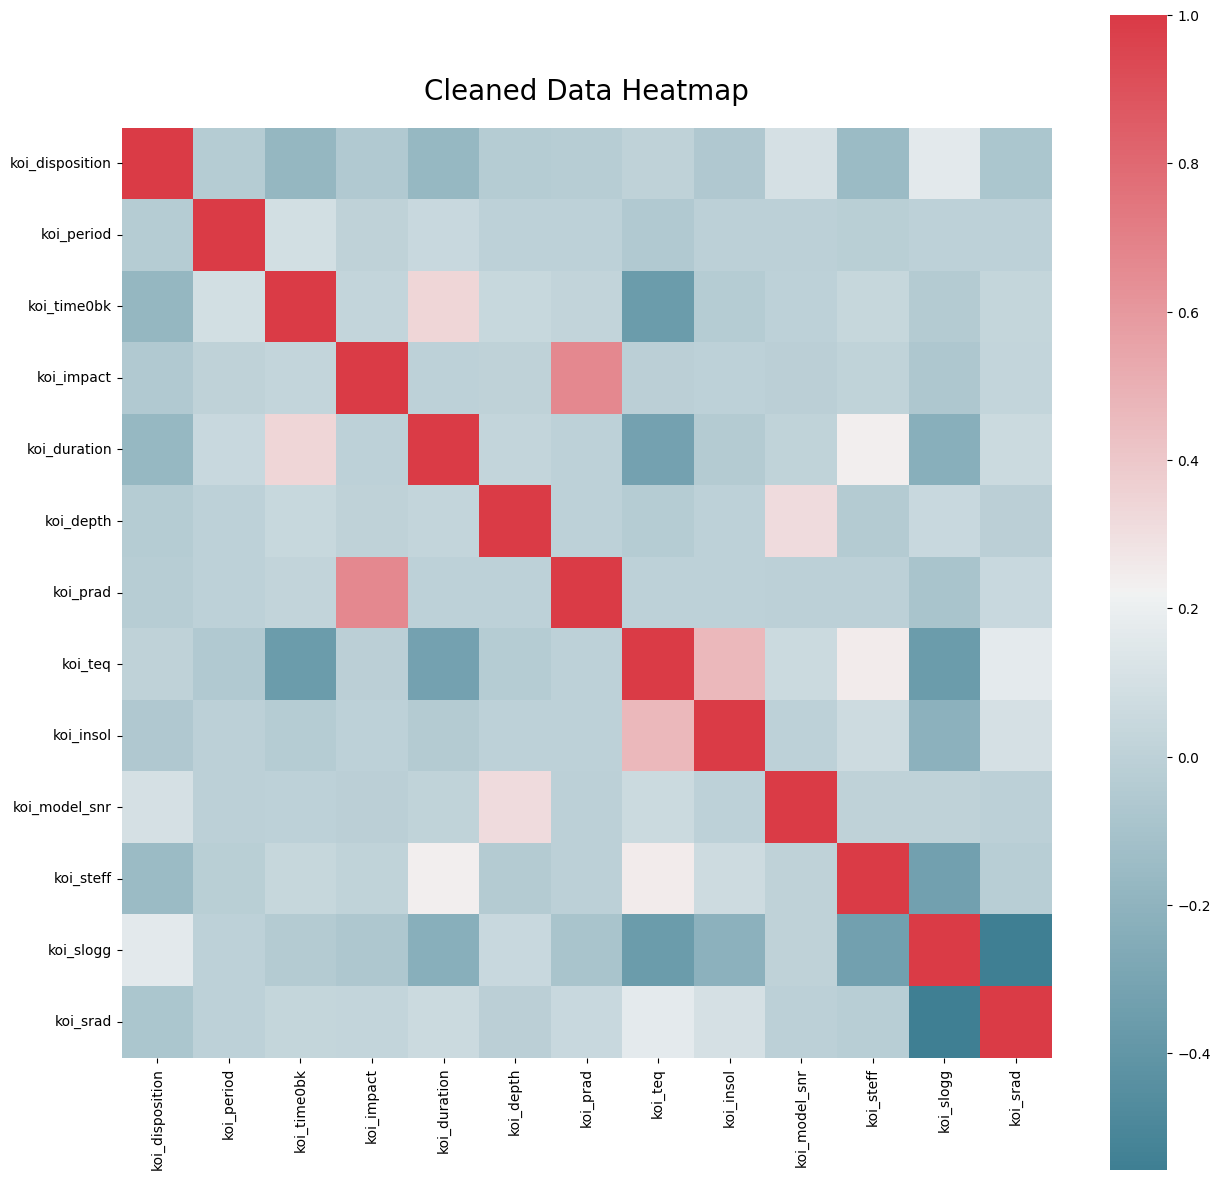

In [ ]:
# Building a correlation matrix
corr = df_filtered.corr()
display(corr)

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Cleaned Data Heatmap', fontsize=20, pad=20)
plt.show()

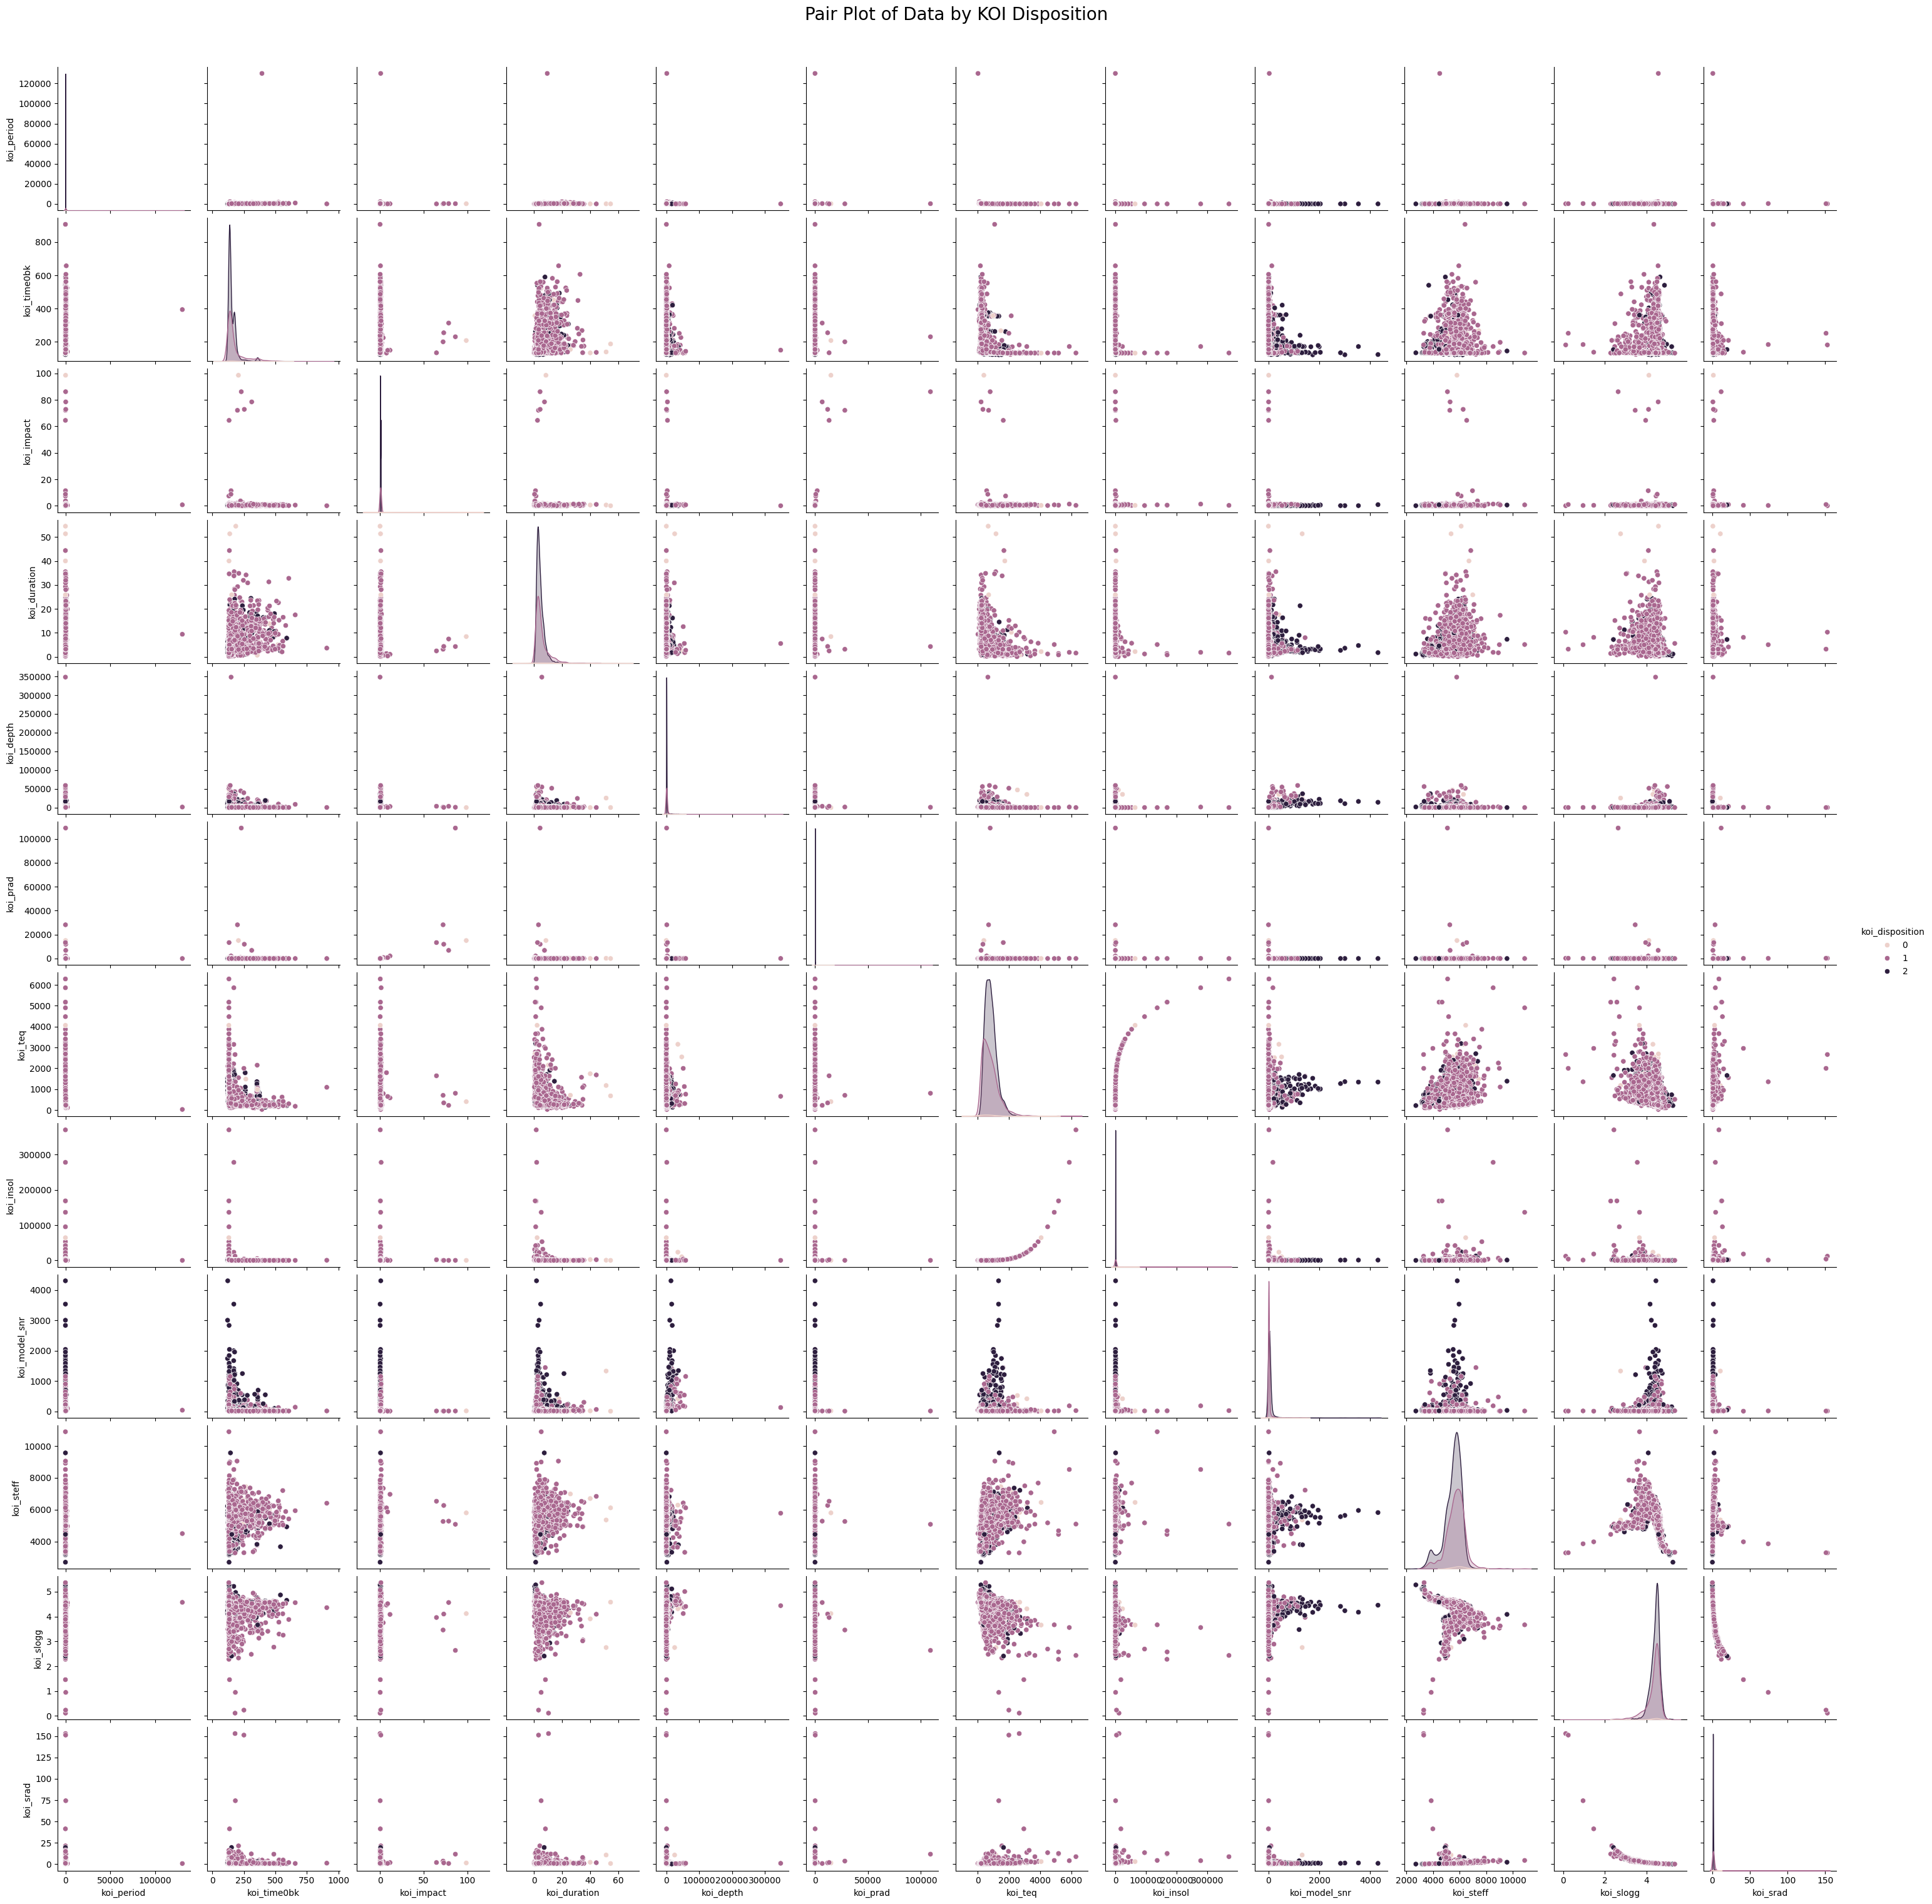

In [ ]:
# Create the pair plot
pairplot_fig = sns.pairplot(df_filtered, hue='koi_disposition')

# Add a title to the pair plot
pairplot_fig.fig.suptitle('Pair Plot of Data by KOI Disposition', size=20, y=1.02)

# Show the plot
plt.show()

### PCA:
When conducting PCA, it is essential to determine the number of principal components to retain by examining the variance that each component explains. Our assessment concludes that retaining eight components is optimal for our analysis, as they cumulatively account for 95% of the variance in our data.

In [ ]:
df_filtered

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
0,2,9.488036,170.538750,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927
1,2,54.418383,162.513840,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927
2,1,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868
3,2,2.525592,171.595550,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046
4,2,11.094321,171.201160,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,1,7.268182,135.934800,0.780,4.9850,46.7,1.66,1444.0,1027.95,9.7,6297.0,3.890,2.219
4643,1,376.379890,486.602200,0.305,13.9900,1140.0,3.26,265.0,1.16,13.3,6231.0,4.488,0.955
4644,1,367.947848,416.209980,0.902,4.2490,1301.0,3.72,228.0,0.64,10.7,5570.0,4.561,0.855
4645,1,1.739849,133.001270,0.043,3.1140,48.5,0.72,1608.0,1585.81,10.6,6119.0,4.444,1.031


In [ ]:
#devide the data into training and testing data
from sklearn.model_selection import train_test_split
X = df_filtered.drop('koi_disposition', axis=1)
y = df_filtered['koi_disposition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

<Figure size 640x480 with 0 Axes>

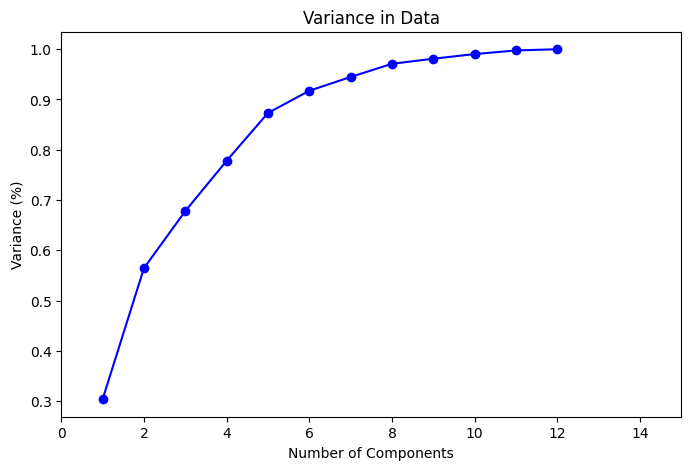

[0.3036951  0.26074411 0.11353714 0.10003894 0.09511905 0.04421727
 0.02739468 0.02628347 0.01006287 0.00926967 0.00719222 0.00244547]


In [ ]:
data = X_train
# Standardizing the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
# Applying PCA
pca = PCA()
pca.fit(data_scaled)
# plot the cumulative sum of explained variance ratio
plt.figure()
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components+1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.xlim((0, 15))
plt.title('Variance in Data')
plt.show()
# print the cumulative sum of explained variance ratio
print(explained_variance)

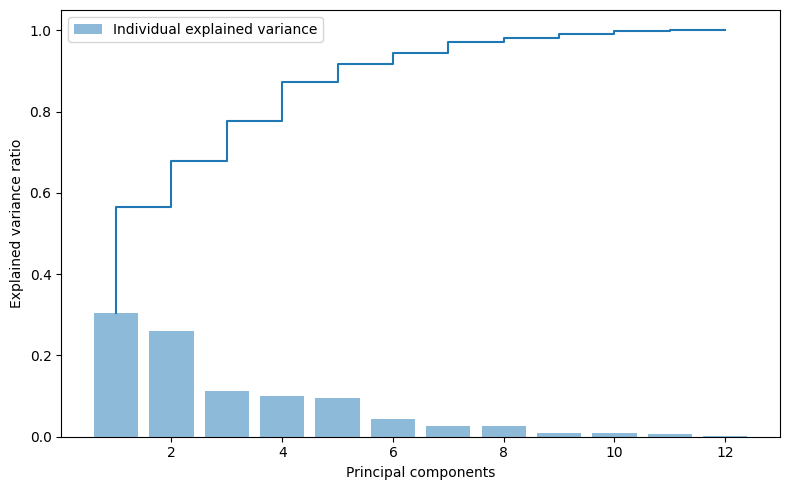

In [ ]:
# draw the scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# select the number of components
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(data_scaled)

# Getting the eigenvalues and explained variance ratios
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Creating a DataFrame to display the eigenvalues with their explained variance
eigenvalues_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(n_components)]).T

display(eigenvalues_df)

# Get eigenvectors
eigenvectors = pca.components_

eig_data = pd.DataFrame(data)
# Create DataFrame with eigenvectors
# Use the original DataFrame's columns (minus 'koi_disposition') for indexing
eigenvector_df = pd.DataFrame(eigenvectors.T, columns=[f'PC{i+1}' for i in range(n_components)], index=df_filtered.iloc[:, 1:].columns)

display(eigenvector_df)

,PC1,PC2,PC3,PC4,PC5,PC6
Eigenvalue,0.012848,0.011031,0.004803,0.004232,0.004024,0.001871
Proportion of Variance,0.303695,0.260744,0.113537,0.100039,0.095119,0.044217
Cumulative Proportion,0.303695,0.564439,0.677976,0.778015,0.873134,0.917352


,PC1,PC2,PC3,PC4,PC5,PC6
koi_period,-0.013109,0.011476,0.015301,-0.012305,-0.003811,-0.011900
koi_time0bk,-0.271976,0.478222,0.552242,-0.421490,-0.444523,-0.119698
koi_impact,-0.005921,0.004447,0.017820,-0.001290,-0.004026,0.091980
koi_duration,-0.088372,0.547344,0.049764,0.189961,0.654080,-0.469513
koi_depth,-0.084247,0.036376,0.389607,0.795577,-0.228879,0.120587
koi_prad,-0.001366,0.002363,0.015106,-0.005527,0.004900,0.077440
koi_teq,0.637172,-0.354130,0.461886,-0.085352,0.021830,-0.463352
koi_insol,0.067905,-0.040120,0.133419,-0.031099,0.044098,-0.090769
koi_model_snr,0.008786,0.010779,0.161227,0.333523,-0.071129,0.012764
koi_steff,0.650248,0.565637,-0.348782,0.099805,-0.340188,0.063692


Using 6 PCA components we can explain 93.17% of variance in our data. 

The first two components (PC1 and PC2) differentiate between the thermal characteristics of exoplanets and their stellar hosts, with PC1 closely associated with the equilibrium temperature (koi_teq), indicating its strong influence by the thermal properties of exoplanets and their transit features. PC2, on the other hand, is significantly correlated with stellar effective temperature (koi_steff), pointing towards its role in capturing variations in the thermal properties of stars, especially highlighting the inverse relationship between stellar temperature and surface gravity.

Further analysis from PC3 to PC6 reveals intricate details of the dataset: PC3's strong positive correlation with koi_time0bk signifies its emphasis on transit timing, while PC4, with its positive correlation to koi_duration, suggests its significance in representing the duration of these transits, associating longer durations with specific stellar characteristics. PC5, through its negative relationship with koi_teq, underscores variations in cooler temperatures across the dataset. Notably, PC6 stands out for its strong positive correlation with koi_model_snr (Signal to Noise Ratio), underlining the component's critical role in distinguishing the quality of exoplanet detection signals.

### Create a DataFrame with Principal Components

In [ ]:
# transform the data
X_train_pca = pca.transform(data_scaled)
data_scaled_test = scaler.transform(X_test)
X_test_pca = pca.transform(data_scaled_test)
# create a new DataFrame
reduced_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
display(reduced_df.head())
%store X_train X_test y_train y_test X_train_pca X_test_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.001824,-0.113485,0.005229,-0.009621,-0.003681,-0.028421
1,-0.018583,0.040919,-0.011425,0.128056,-0.014353,0.074722
2,-0.073711,-0.091827,-0.021861,-0.011034,0.007840,-0.006632
3,-0.127641,-0.175947,0.018087,-0.018461,0.018082,-0.022010
4,-0.029003,-0.079632,-0.012318,-0.010398,0.012708,0.000472


Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'X_train_pca' (ndarray)
Stored 'X_test_pca' (ndarray)


### PCA Correlation Analysis

In [ ]:
# Building a correlation matrix
corr = reduced_df.corr()
display(corr)

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.000000e+00,-4.604925e-16,1.351167e-15,1.156455e-16,3.297728e-16,7.262274e-16
PC2,-4.604925e-16,1.000000e+00,-2.183289e-16,7.302573e-16,1.050094e-15,4.266432e-16
PC3,1.351167e-15,-2.183289e-16,1.000000e+00,8.995029e-17,-4.333395e-16,-2.082585e-16
PC4,1.156455e-16,7.302573e-16,8.995029e-17,1.000000e+00,-2.270842e-16,3.090002e-16
PC5,3.297728e-16,1.050094e-15,-4.333395e-16,-2.270842e-16,1.000000e+00,4.323318e-16
PC6,7.262274e-16,4.266432e-16,-2.082585e-16,3.090002e-16,4.323318e-16,1.000000e+00


This correlation matrix shows little to no correlation between the principal components. This is a good sign that the principal components are independent of each other. This is important because the principal components are used to reduce the dimensionality of the data while preserving the variance in the data. If the principal components were highly correlated, then the dimensionality reduction would not be as effective.

Stored 'koi_reduced_df' (DataFrame)
Stored 'reduced_df' (DataFrame)


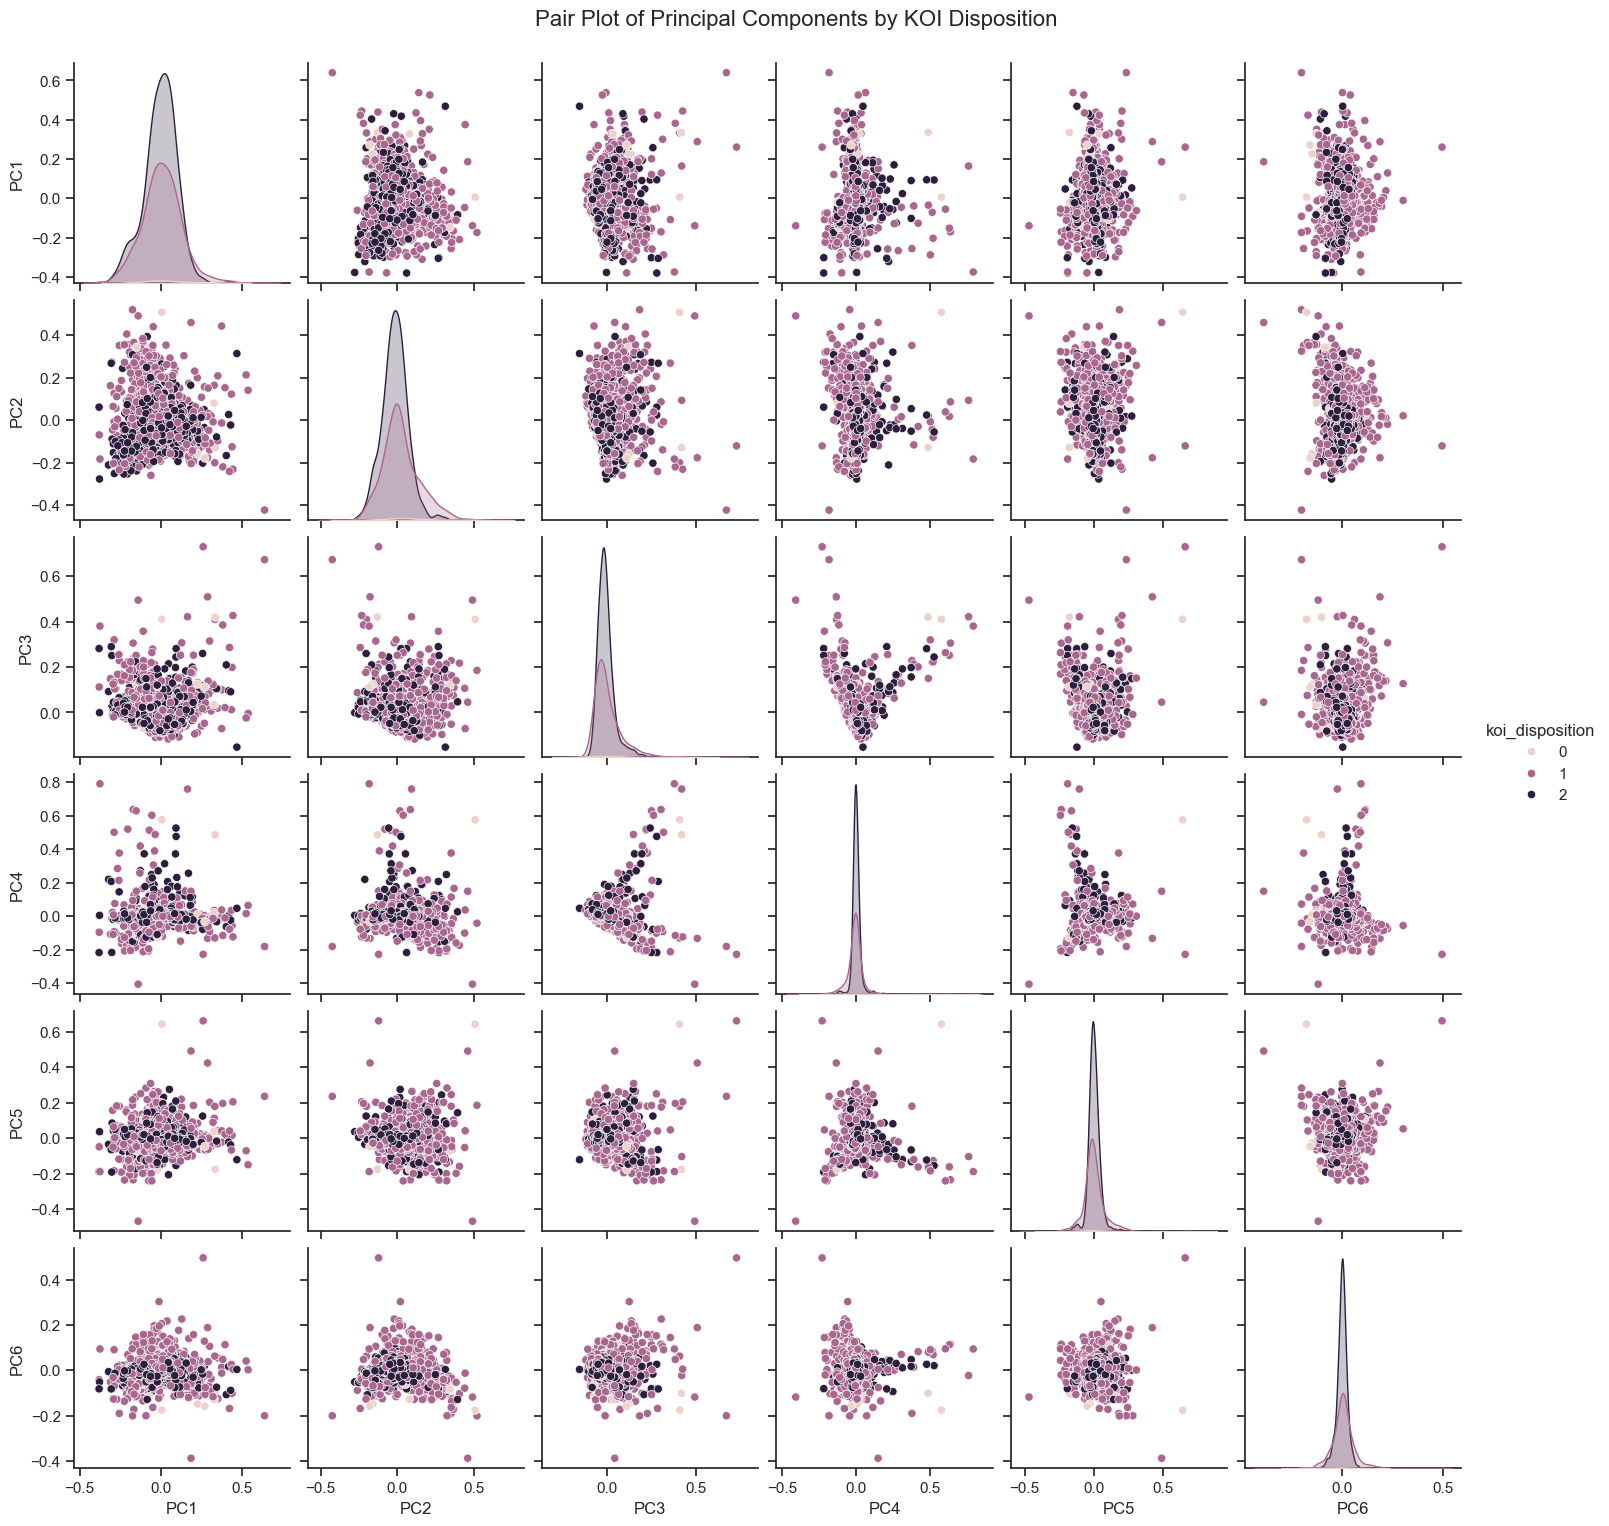

In [ ]:
# add koi_disposition to the reduced_df
koi_reduced_df = reduced_df.copy()
koi_reduced_df['koi_disposition'] = y_train.values
%store koi_reduced_df reduced_df
# Plotting the pair plot of the principal components
# Setting the aesthetic style of the plots
sns.set(style="ticks")

# Generating the pair plot
pairplot = sns.pairplot(koi_reduced_df, hue="koi_disposition")
pairplot.fig.suptitle('Pair Plot of Principal Components by KOI Disposition', fontsize=16, y=1.02)
plt.show()

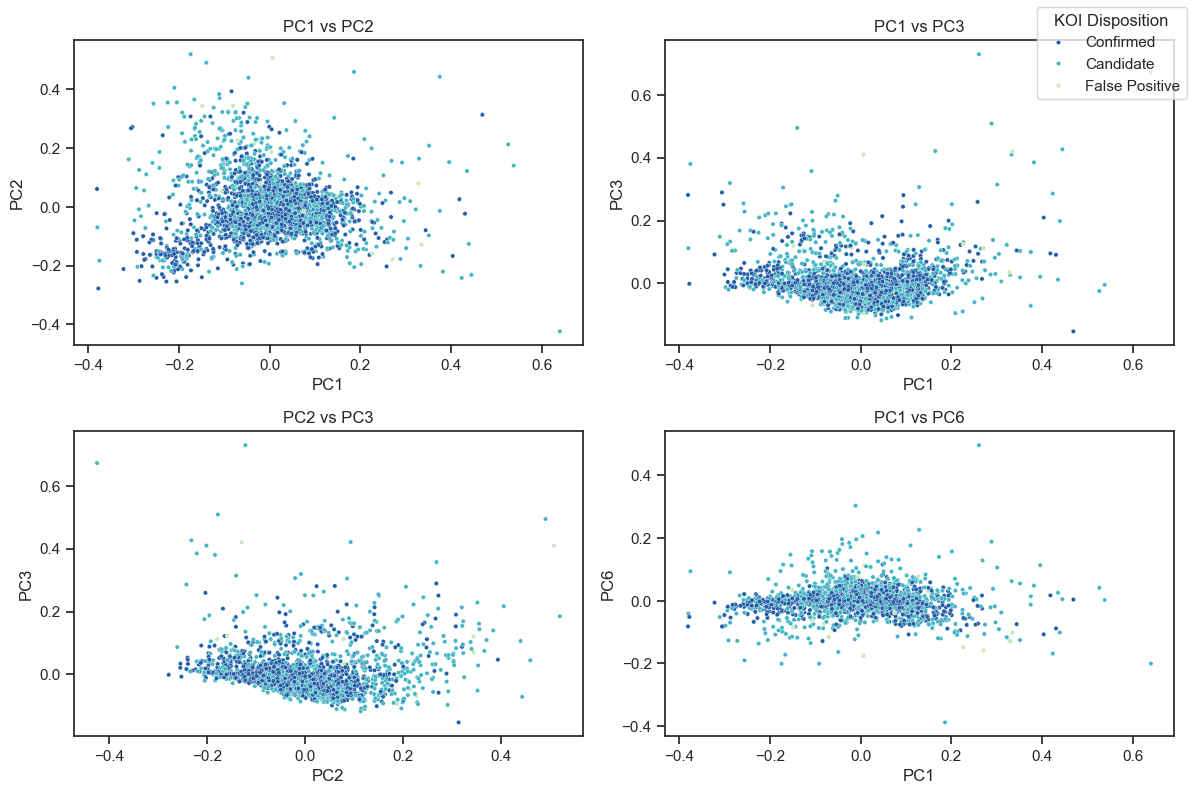

In [ ]:
# Create a figure and a set of subplots for individual scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Mapping for koi_disposition to improve readability in plots
disposition_mapping = {0: "False Positive", 1: "Candidate", 2: "Confirmed"}
koi_reduced_df['koi_disposition_mapped'] = koi_reduced_df['koi_disposition'].map(disposition_mapping)

# Plotting individual scatter plots
sns.scatterplot(ax=axes[0,0], data=koi_reduced_df, x='PC1', y='PC2', hue='koi_disposition_mapped', palette='YlGnBu_r', s=10)
axes[0, 0].set_title('PC1 vs PC2')

sns.scatterplot(ax=axes[0,1], data=koi_reduced_df, x='PC1', y='PC3', hue='koi_disposition_mapped', palette='YlGnBu_r', s=10)
axes[0, 1].set_title('PC1 vs PC3')

sns.scatterplot(ax=axes[1,0], data=koi_reduced_df, x='PC2', y='PC3', hue='koi_disposition_mapped', palette='YlGnBu_r', s=10)
axes[1, 0].set_title('PC2 vs PC3')

sns.scatterplot(ax=axes[1,1], data=koi_reduced_df, x='PC1', y='PC6', hue='koi_disposition_mapped', palette='YlGnBu_r', s=10)
axes[1, 1].set_title('PC1 vs PC6')

# Adjusting the legend
# Collecting handles and labels for the legend
handles, labels = axes[0, 0].get_legend_handles_labels()
# Placing one legend at the best location
fig.legend(handles, labels, loc='upper right', title='KOI Disposition')
# Removing redundant legends from subplots
for ax in axes.flat:
    ax.get_legend().remove()

# Optimize layout
plt.tight_layout()
plt.show()

In [ ]:
# Plot PCA1 vs PCA2 vs PCA3

import plotly.graph_objects as go
# Create a Plotly figure
fig = go.Figure()

color_palette = {
    "False Positive": "palegreen",
    "Candidate": "darkcyan",
    "Confirmed": "blue"
}

# Add traces for each unique disposition status
for status in koi_reduced_df['koi_disposition_mapped'].unique():
    df_subset = koi_reduced_df[koi_reduced_df['koi_disposition_mapped'] == status]
    fig.add_trace(go.Scatter3d(
        x=df_subset['PC1'],
        y=df_subset['PC2'],
        z=df_subset['PC3'],
        mode='markers',
        marker=dict(
            size=3,
            color=color_palette[status]  # Use the color from the palette
        ),
        name=status
    ))

# Setting the layout for the 3D plot
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title_text='KOI Disposition',
     width=800,  # Width of the figure in pixels
     height=600,  # Height of the figure in pixels
     title={
        'text': "3D PCA Visualization of Kepler Objects of Interest (KOI)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()

These visualizations suggest that PCA is not as effective at capturing significant variance related to the KOI disposition, as indicated by the minimal clustering patterns of the different statuses: False Positive, Candidate, and Confirmed. While there is some degree of separation between the categories, indicating the effectiveness of PCA in distinguishing between different dispositions, overlaps between Candidate and Confirmed categories suggest similarities in their characteristics. This overlap might reflect the continuum from Candidate to Confirmed status, where additional verification and observation are required.

### UMAP:
To better visualize the data, we have reduced it to two dimensions.

In [ ]:
# import the libraries
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from dataclasses import replace
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN

### Visualization:

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



[[ 5.5178165  5.744097 ]
 [ 4.256895   7.7456455]
 [ 4.2651243  4.405431 ]
 ...
 [ 1.3320793  2.4576771]
 [-1.8507499 11.996422 ]
 [-3.8023567  7.761124 ]]
(4647, 2)


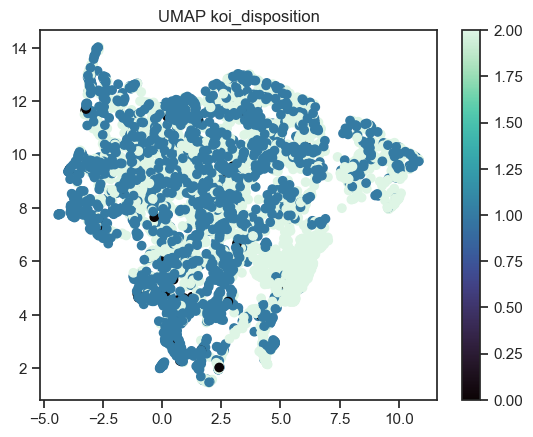

In [ ]:
# UMAP
# remove the koi_disposition column since it is the target
test = df_filtered.iloc[:, 1:].values
# Standardizing the features
reducer = umap.UMAP(random_state=1)
scaled_test_data = StandardScaler().fit_transform(test)
# Applying UMAP
# create a new DataFrame
embedding = reducer.fit_transform(scaled_test_data)
print(embedding)
print(embedding.shape)
# plot the UMAP 
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df_filtered.koi_disposition, 
    cmap='mako'
)

plt.colorbar()
plt.title('UMAP koi_disposition')
plt.show()

Text(0.5, 1.0, 'UMAP koi_impact')

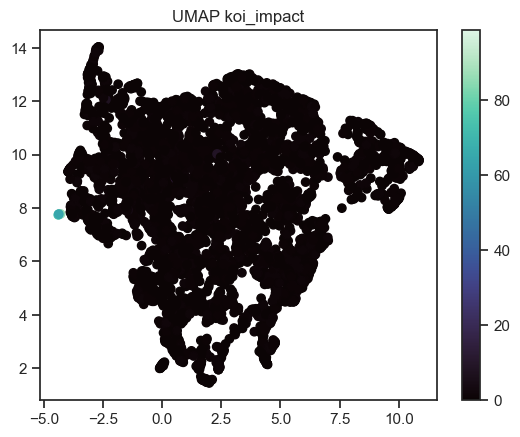

In [ ]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_impact,cmap='mako')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_impact')

Text(0.5, 1.0, 'UMAP koi_teq')

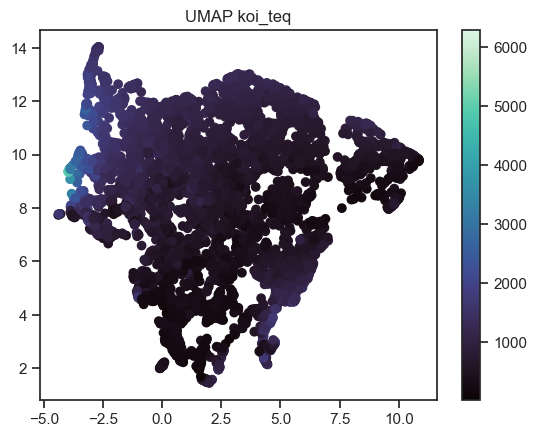

In [ ]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_teq,cmap='mako')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_teq')

Text(0.5, 1.0, 'UMAP koi_slogg')

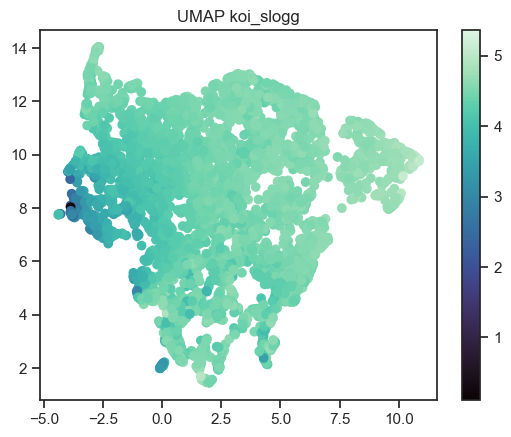

In [ ]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_slogg,cmap='mako')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_slogg')